#Scraping Data ***Shopee E-Commerce***

In [ ]:
pip install google-play-scraper pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd

# Mengambil data review aplikasi Shopee
result, _ = reviews(
    'com.shopee.id',  # ID aplikasi Shopee di Google Play Store
    lang='id',        # Bahasa Indonesia
    country='id',     # Negara Indonesia
    sort=Sort.NEWEST, # Mengambil review terbaru
    count=100000         # Jumlah review yang ingin diambil (bisa disesuaikan)
)

# Mengonversi hasil ke dalam DataFrame pandas
df = pd.DataFrame(result)

# Memilih kolom yang relevan
df_selected = df[['userName', 'score', 'content', 'at']]

# Menampilkan beberapa review sebagai contoh
print(df_selected.head())

# Menyimpan hasil ke file CSV
df_selected.to_csv('review_shopee.csv', index=False)
print("Data review berhasil disimpan ke 'review_shopee.csv'")


          userName  score                                            content  \
0  Pengguna Google      2  Setiap awal buka langsung video yang muncul.ja...   
1  Pengguna Google      5                                              👍👍👍👍👍   
2  Pengguna Google      1                                              buruk   
3  Pengguna Google      5       Gokil tapi jangan naik dong biaya penanganan   
4  Pengguna Google      1  stress nih Shopee capit, udah kecapit koin nya...   

                   at  
0 2024-12-27 04:14:34  
1 2024-12-27 04:12:26  
2 2024-12-27 04:12:26  
3 2024-12-27 04:10:08  
4 2024-12-27 04:10:05  
Data review berhasil disimpan ke 'review_shopee.csv'


In [ ]:
df = pd.read_csv('review_shopee.csv')

In [ ]:
df

,userName,score,content,at
0,Pengguna Google,2,Setiap awal buka langsung video yang muncul.ja...,2024-12-27 04:14:34
1,Pengguna Google,5,👍👍👍👍👍,2024-12-27 04:12:26
2,Pengguna Google,1,buruk,2024-12-27 04:12:26
3,Pengguna Google,5,Gokil tapi jangan naik dong biaya penanganan,2024-12-27 04:10:08
4,Pengguna Google,1,"stress nih Shopee capit, udah kecapit koin nya...",2024-12-27 04:10:05
...,...,...,...,...
99995,kuda terbangku,5,Mantab,2024-10-17 13:06:59
99996,Lasma Rambe,5,Ini adalah aplikasi yang sangat membantu dalam...,2024-10-17 13:05:37
99997,Afiqah Aisy,5,Membantu sekali untuk mendapatkan barang2 inca...,2024-10-17 13:04:50
99998,dwi setiawan,5,"Barang mudah dicari, harga murah, kode pembaya...",2024-10-17 13:04:19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userName  100000 non-null  object
 1   score     100000 non-null  int64 
 2   content   99999 non-null   object
 3   at        100000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


#Preprocessing Data

##import library

In [ ]:
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

##Read data

In [ ]:
df = pd.read_csv('/content/shopee_review_analysis.csv')
df.head()

,Unnamed: 0,userName,score,content,at,cleaned_content,sentiment
0,0,Pengguna Google,4,Entahlah kenapa shopee yg sekarang pengirimann...,2024-12-16 08:39:35,shopee pengirimannya udah engga segercep pesen...,Positive
1,1,Pengguna Google,5,Mantap,2024-12-16 08:39:13,mantap,Positive
2,2,Pengguna Google,5,Top,2024-12-16 08:38:24,top,Positive
3,3,Pengguna Google,5,Kenapa Di Shoppe Ituh Selalu Sama Pengiriman N...,2024-12-16 08:37:59,shoppe ituh pengiriman samgat lambat perbaiki,Positive
4,4,Pengguna Google,5,Sangat puas dengan paket yg dkirim,2024-12-16 08:37:22,puas paket dkirim,Positive


In [ ]:
# Check the shape of the dataset after removing duplicates
df.shape
#remove missing values
df.isnull().sum()

,0
Unnamed: 0,0
userName,0
score,0
content,0
at,1
cleaned_content,760
sentiment,1


In [ ]:
# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

# Remove rows with any missing values
df.dropna(inplace=True)

# Display some info
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 20989 entries, 0 to 21747
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       20989 non-null  int64 
 1   userName         20989 non-null  object
 2   score            20989 non-null  int64 
 3   content          20989 non-null  object
 4   at               20989 non-null  object
 5   cleaned_content  20989 non-null  object
 6   sentiment        20989 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB
None


(20989, 7)

## Representasi Numerik (TF-IDF)

In [ ]:
# Mengubah Teks menjadi Representasi Numerik (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000)  # Batasi jumlah fitur
X_tfidf = vectorizer.fit_transform(df['cleaned_content'])

##Normalisasi Data

In [ ]:
# Normalisasi Data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf)

In [ ]:
X_scaled

<20989x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 77854 stored elements in Compressed Sparse Row format>

## Jumlah Cluster dengan Metode Elbow

In [ ]:
# Menentukan Jumlah Cluster dengan Metode Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

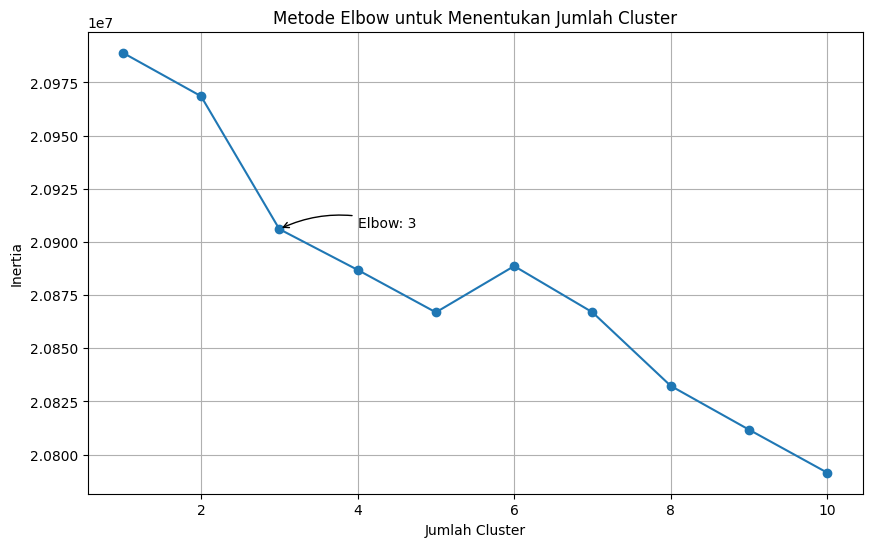

In [ ]:
# Visualisasi Metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.grid()
diff = np.diff(inertia)
diff2 = np.diff(diff)
elbow_point = np.argmax(diff2) + 2  # +2 to adjust for the differences

# Annotate the elbow point on the plot
plt.annotate(f'Elbow: {elbow_point}', xy=(elbow_point, inertia[elbow_point - 1]),
             xytext=(elbow_point + 1, inertia[elbow_point - 1] + 1000),  # Adjust text position
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.show()
plt.show()

In [ ]:
# 7. Melakukan Clustering dengan K-Means
n_clusters = 3  # jumlah cluster berdasarkan hasil elbow
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
df

,Unnamed: 0,userName,score,content,at,cleaned_content,sentiment,cluster
0,0,Pengguna Google,4,Entahlah kenapa shopee yg sekarang pengirimann...,2024-12-16 08:39:35,shopee pengirimannya udah engga segercep pesen...,Positive,2
1,1,Pengguna Google,5,Mantap,2024-12-16 08:39:13,mantap,Positive,0
2,2,Pengguna Google,5,Top,2024-12-16 08:38:24,top,Positive,0
3,3,Pengguna Google,5,Kenapa Di Shoppe Ituh Selalu Sama Pengiriman N...,2024-12-16 08:37:59,shoppe ituh pengiriman samgat lambat perbaiki,Positive,2
4,4,Pengguna Google,5,Sangat puas dengan paket yg dkirim,2024-12-16 08:37:22,puas paket dkirim,Positive,0
...,...,...,...,...,...,...,...,...
21743,21743,Pengguna Google,4,Bagus,2024-12-03 06:17:31,bagus,Positive,0
21744,21744,Pengguna Google,5,"Bagus, jd mudah untuk berbelajanja",2024-12-03 06:16:16,bagus jd mudah berbelajanja,Positive,0
21745,21745,Pengguna Google,5,Sangat baguss ! Dan bermanfaat,2024-12-03 06:15:17,baguss bermanfaat,Positive,0
21746,21746,Pengguna Google,1,shope expres busuk sudah terlalu kecewa!! Sera...,2024-12-03 06:14:58,shope expres busuk kecewa serakah pake shope e...,Negative,2


In [ ]:
# Count the occurrences of each unique value in the 'score' column
score_counts = df['score'].value_counts()

score_counts

,count
score,
5,15419
1,2947
4,1322
3,738
2,563


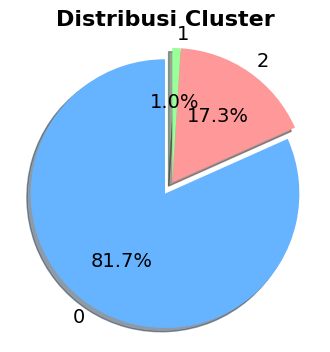

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each category
category_counts = df['cluster'].value_counts()

# Define color palette
colors = ['#66b3ff','#ff9999', '#99ff99']
# Explode the largest slice
explode = (0.1, 0, 0)
# Create the pie chart with enhancements
plt.figure(figsize=(4, 4))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True, # Add shadow for depth
        textprops={'fontsize': 14}) # Increase font size of labels
plt.title('Distribusi Cluster', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

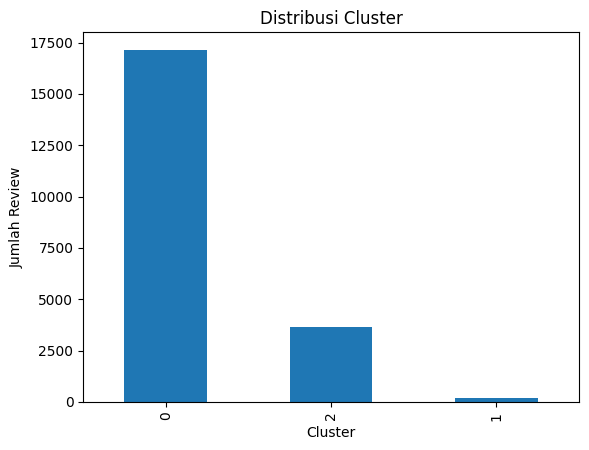

In [ ]:
# 8. Visualisasi Hasil Clustering dengan Diagram Batang
df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Review')
plt.title('Distribusi Cluster')
plt.show()

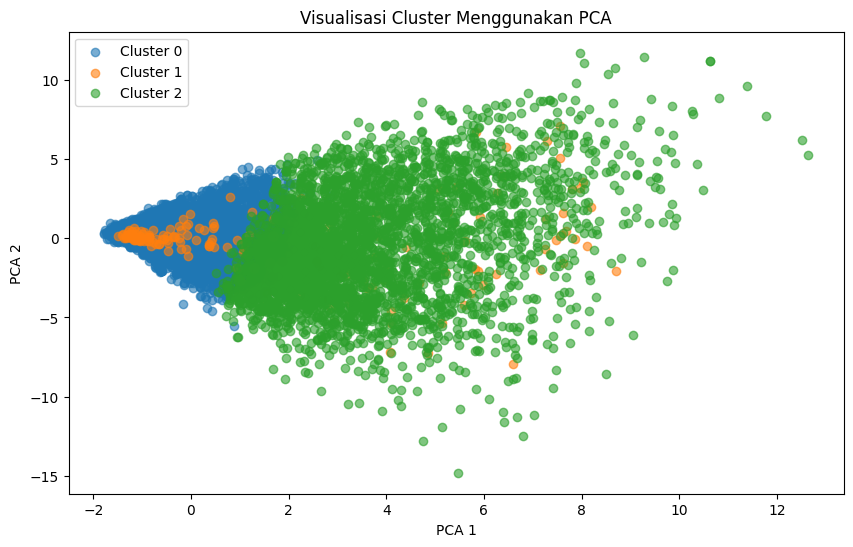

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Visualisasi PCA untuk Cluster
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled.toarray())

plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[df['cluster'] == i, 0], X_pca[df['cluster'] == i, 1], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Cluster Menggunakan PCA')
plt.legend()
plt.show()

In [ ]:
# 1. Menangani nilai kosong pada 'cleaned_content'
df['cleaned_content'] = df['cleaned_content'].fillna('')

<ipython-input-64-95dc172ad759>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


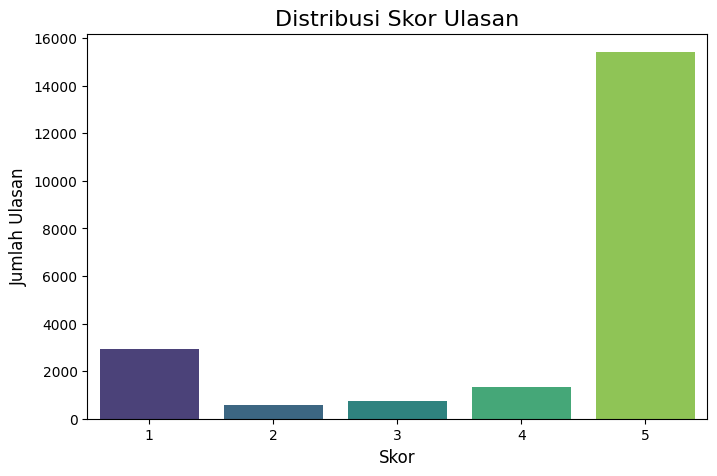

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# 2. Analisis distribusi skor
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribusi Skor Ulasan', fontsize=16)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

<ipython-input-65-cd198ac95061>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel', order=['Positive', 'Neutral', 'Negative'])


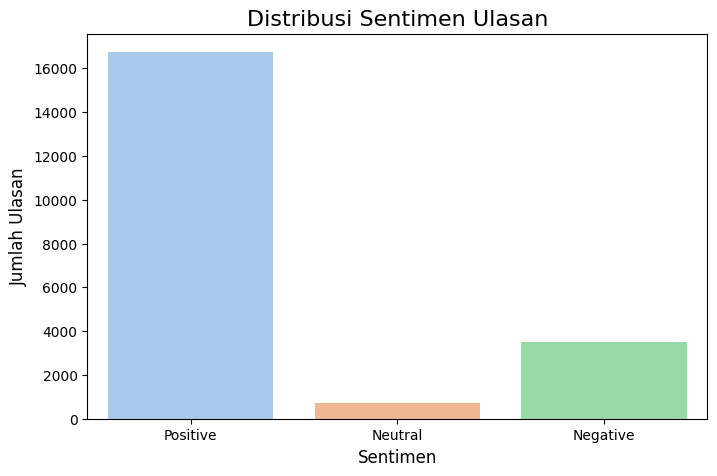

In [ ]:
# 3. Analisis distribusi sentimen
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='pastel', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribusi Sentimen Ulasan', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()


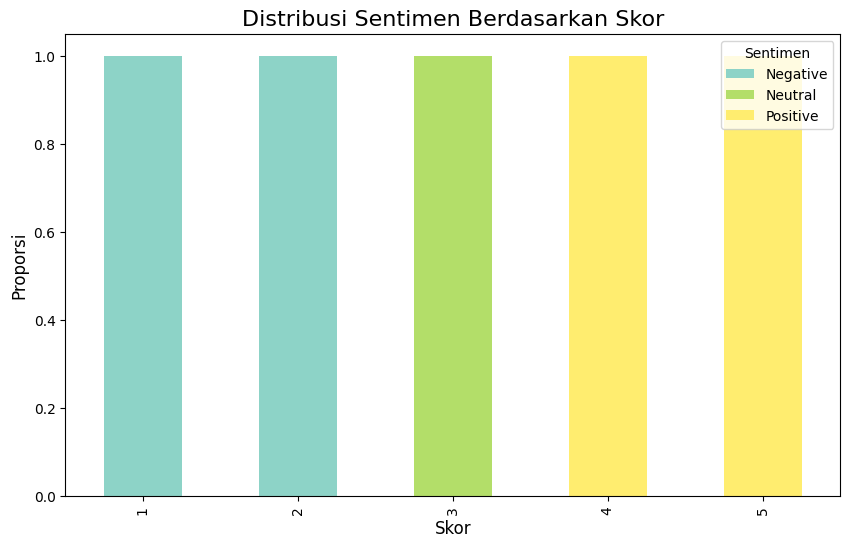

In [ ]:
# 4. Korelasi antara skor dan sentimen
sentiment_score = df.groupby('score')['sentiment'].value_counts(normalize=True).unstack()
sentiment_score.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Distribusi Sentimen Berdasarkan Skor', fontsize=16)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Proporsi', fontsize=12)
plt.legend(title='Sentimen', loc='upper right')
plt.show()

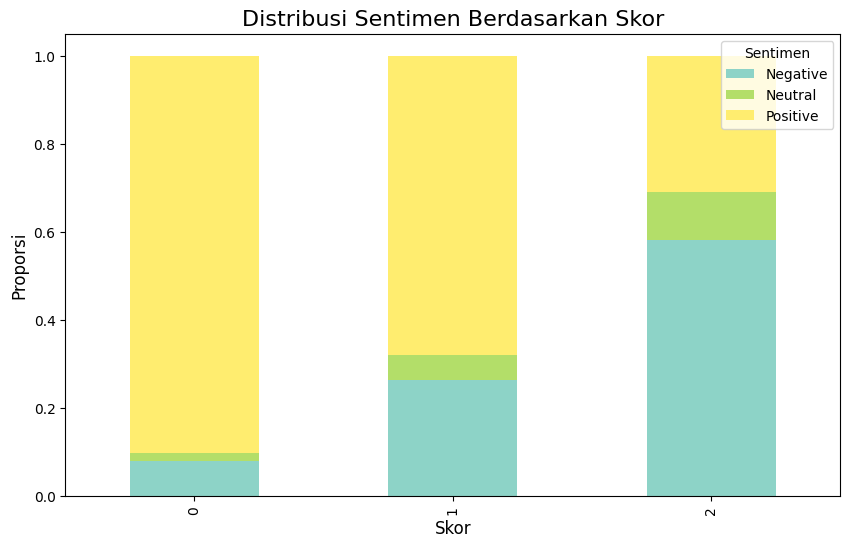

In [ ]:
# 4. Korelasi antara skor dan sentimen
sentiment_score = df.groupby('cluster')['sentiment'].value_counts(normalize=True).unstack()
sentiment_score.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Distribusi Sentimen Berdasarkan Skor', fontsize=16)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Proporsi', fontsize=12)
plt.legend(title='Sentimen', loc='upper right')
plt.show()

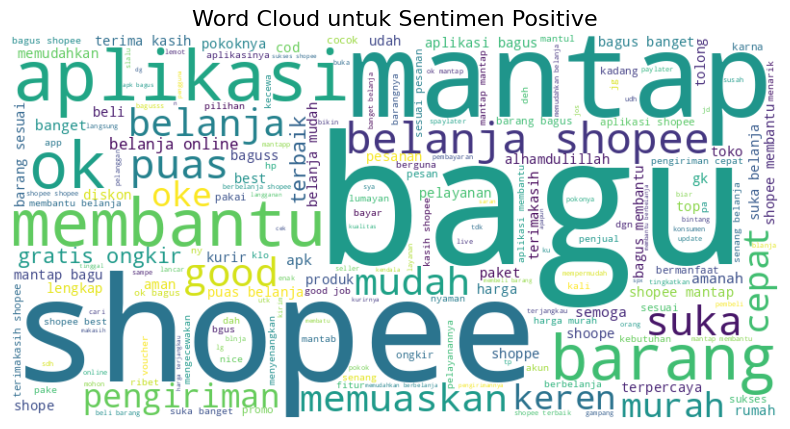

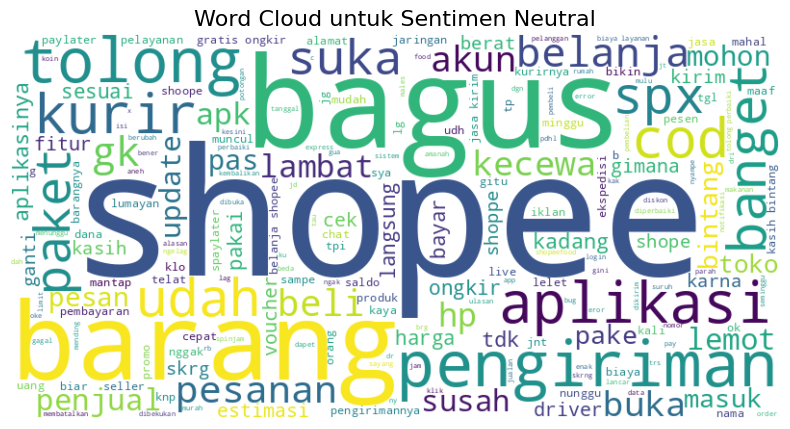

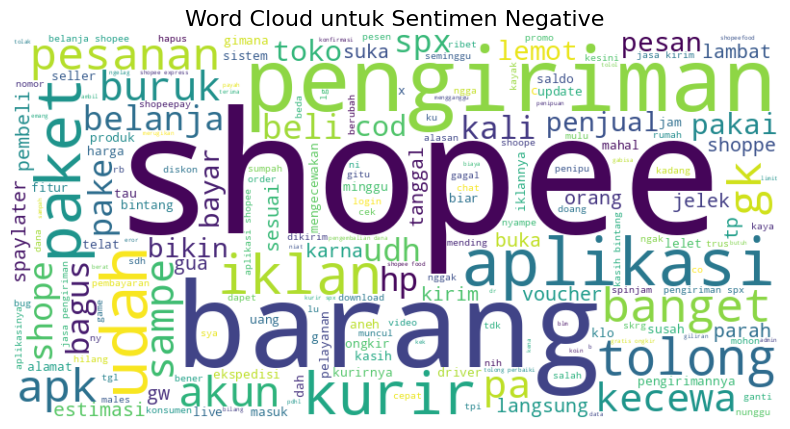

In [ ]:
# 5. Word Cloud untuk masing-masing sentimen
sentiments = ['Positive', 'Neutral', 'Negative']
for sentiment in sentiments:
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Sentimen {sentiment}', fontsize=16)
    plt.show()